# 逻辑回归使用多项式特征



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [3]:
X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:,0] ** 2 + X[:,1]**2 < 1.5, dtype=int)

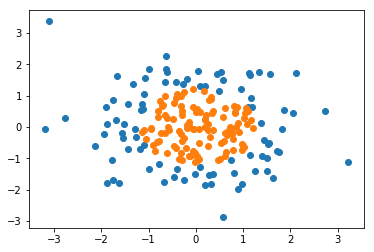

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用逻辑回归

In [5]:
%run LogisticRegression.py

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.score(X, y)

0.605

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100 )).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100 )).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59F', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_camp)

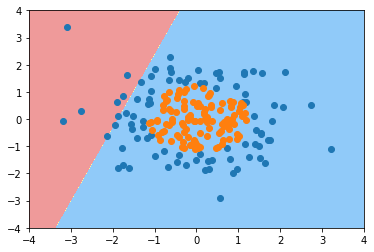

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 添加多项式项

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

In [10]:
poly2_log_reg = PolynomialLogisticRegression(2)
poly2_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [11]:
poly2_log_reg.score(X, y)

0.95

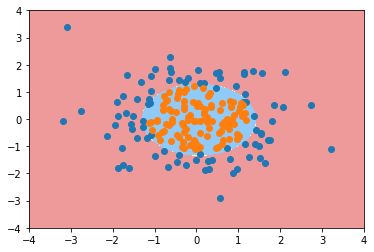

In [12]:
plot_decision_boundary(poly2_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [13]:
# overfitting
poly20_log_reg = PolynomialLogisticRegression(20)
poly20_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [14]:
poly20_log_reg.score(X, y)

0.955

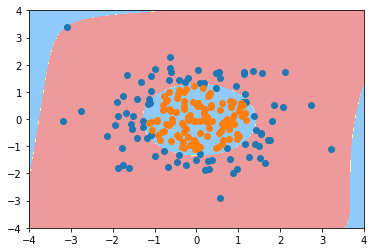

In [15]:
plot_decision_boundary(poly20_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()